# Podstawowe algorytmy teorii grafów

**G** - Graf<br>
**V** - Zbiór wierzchołków / węzłów grafu **G**<br>
**E** - Zbiór krawędzi - Rodzina dwuelemntowych podzbiorów zbioru **V**

In [8]:
#Imports:
import numpy as np
from copy import deepcopy,copy
import matplotlib.pyplot as plt
from typing import List,Tuple

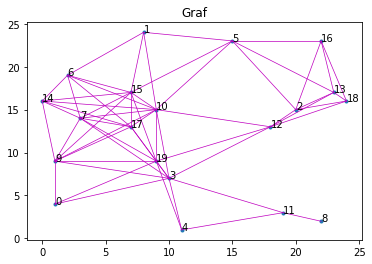

In [29]:
#G=Graph(*make_net_graph(20,25,10))
G.draw('m',lw=0.7)

# 1) Algorytm Dijkstry

Algorytm zachłanny, służący do znajdowania najkrótszej ścieżki z pojedyńczego źródła w grafie o nieujemnych wagach.

### Algorytm

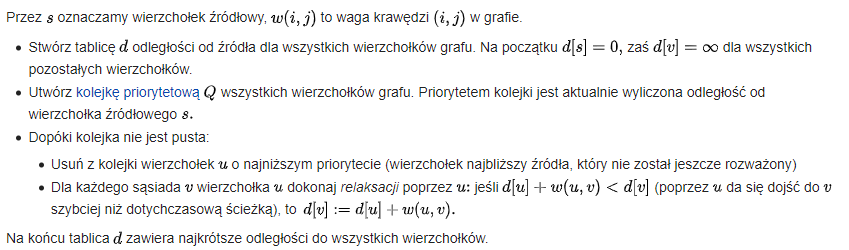

In [30]:
def dijkstra(G:Graph,start:int,stop:int =None):
    dct=Map(start,G.size_) 
    not_visited=np.arange(0,len(dct),1).tolist()
    u=dct.get_closest_from(not_visited)
    while u is not None:
        not_visited.remove(u)
        for v in G.get_neighbours(u):
            if dct[v][0]>dct[u][0]+G[u][v]:
                dct[v]=[round(dct[u][0]+G[u][v],2),u]
        u=dct.get_closest_from(not_visited)
    if stop is None:
        return dct
    else:
        return dct.reconstruct_path(start,stop)

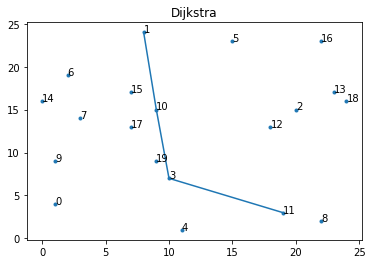

Cost: 26.97


In [31]:
path,cost=dijkstra(G,1,11)
G.draw(path,title='Dijkstra')
print("Cost: "+str(cost))

# 2)Algorytm A*

Algorytm heurystyczny znajdowania najkrótszej ścieżki w grafie ważonym z dowolnego wierzchołka do wierzchołka spełniającego określony warunek zwany testem celu. Algorytm jest zupełny i optymalny, w tym sensie, że znajduje ścieżkę, jeśli tylko taka istnieje, i przy tym jest to ścieżka najkrótsza.

Heurystyka – metoda znajdowania rozwiązań, dla której nie ma gwarancji znalezienia rozwiązania optymalnego, a często nawet prawidłowego.

### Algorytm

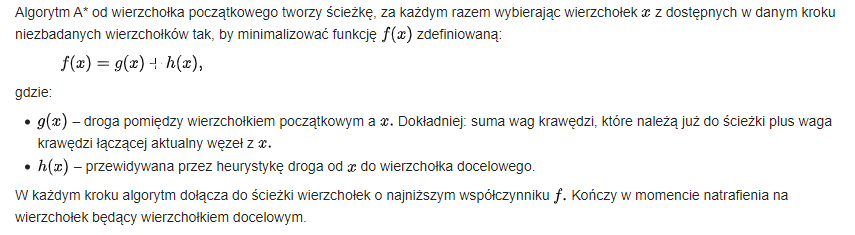

In [32]:
#Funkcja do znajdowania najlepszego połączenia z węzła u
def best_connection(mat,heu,u,g_u,stop):
    f_min=np.inf
    x=-1
    for id in range(len(mat)):
        if id!=u:
            f=g_u+mat[u][id]+heu[id][stop]
            if f<f_min:
                f_min=f
                x=id
    mat[u][x]=mat[x][u]=np.inf
    return (f_min,u,x)

In [33]:
def a_star(G:Graph,start:int,stop:int):
    mat=deepcopy(G)
    heu=mat.h_
    open=Queue()
    closed=Map(start,len(mat))
    open.add(best_connection(mat,heu,start,0,stop))
    while True:
        f,u,x=open.get()
        g=f-heu[x][stop]
        if x in closed and g<closed[x][0]:
            closed[x]=(round(g,2),u)
        elif x not in closed:
            closed[x]=(round(g,2),u)
        if x==stop:
            return closed.reconstruct_path(start,stop)
        open.add(best_connection(mat,heu,u,closed[u][0],stop))
        open.add(best_connection(mat,heu,x,closed[x][0],stop))
    return -1 

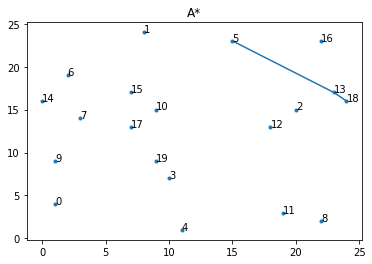

Cost: 11.41


In [34]:
path,cost=a_star(G,5,18)
G.draw(path,title='A*')
print("Cost: "+str(cost))

# 3)Algorytm Bellmana-Forda

Algorytm służący do wyszukiwania najkrótszych ścieżek w grafie ważonym z wierzchołka źródłowego do wszystkich pozostałych wierzchołków.

Idea algorytmu opiera się na metodzie relaksacji (dokładniej następuje relaksacja *|V|-1* razy każdej z krawędzi).

### Pseudokod

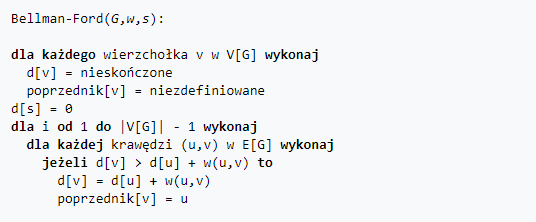

In [35]:
def bellman_ford(G:Graph,start:int,stop:int=None):
    n=len(G)
    tab=Map(start,n)
    for useless_variable in range(n-1):
        for u,v in G.cons_:
            if tab[u][0]>tab[v][0]+G[u][v]:
                tab[u][0]=round(tab[v][0]+G[u][v],2)
                tab[u][1]=v
            if tab[v][0]>tab[u][0]+G[u][v]:
                tab[v][0]=round(tab[u][0]+G[u][v],2)
                tab[v][1]=u
    if stop:
        return tab.reconstruct_path(start,stop)
    else:
        return tab
    return 1

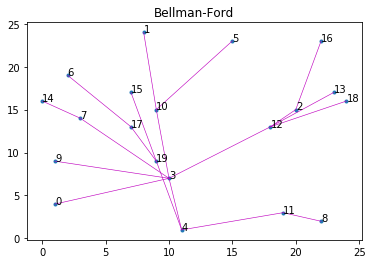

In [36]:
#Wszystkie najkrótsze połączenia z jednego węzła
con=bellman_ford(G,4)
G.draw(con,'m',lw=0.6,title='Bellman-Ford')

# 4)Algorytm Floyda-Warshalla

Algorytm Floyda-Warshalla wykorzystujący metodę programowania dynamicznego algorytm służący do znajdowania najkrótszych ścieżek pomiędzy wszystkimi parami wierzchołków w grafie ważonym. Graf może zawierać gałęzie zarówno o dodatniej i o ujemnej wadze („długości”), lecz nie może zawierać ujemnych cykli (cykli, w których suma wag krawędzi jest ujemna).

### Pseudokod

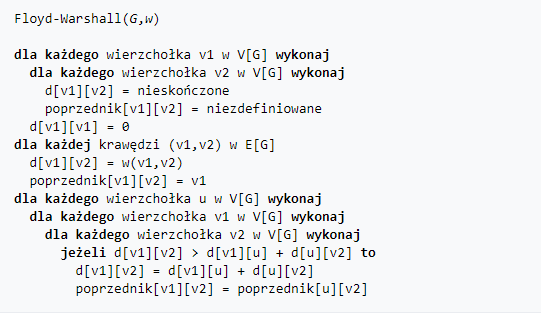

In [37]:
def floyd_warshall(G:Graph,start=None,stop=None):
    n=len(G)
    d=deepcopy(G.matrix_)
    prev=np.multiply(np.arange(n,dtype=int),np.ones([n,n],dtype=int)).T.tolist()
    for u in range(n):
        for v1 in range(n):
            for v2 in range(n):
                if d[v1][v2]>d[v1][u]+d[u][v2]:
                    d[v1][v2]=round(d[v1][u]+d[u][v2],2)
                    prev[v1][v2]=prev[u][v2]
    if start is None:
        return (d,prev)
    dct=Map(start,n)
    for i in range(n):
        dct[i]=[d[start][i],prev[start][i]]
    if stop is None:
        return dct
    else:
        return  dct.reconstruct_path(start,stop)

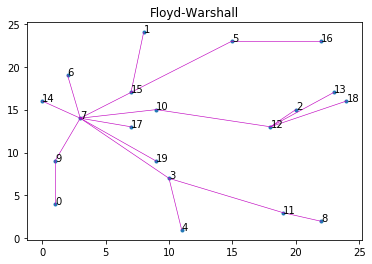

In [38]:
#Wszystkie najkrótsze połączenia z jednego węzła
con=floyd_warshall(G,7)
G.draw(con,'m',lw=0.6,title='Floyd-Warshall')

# 5)Algorytm Prima

Algorytm zachłanny wyznaczający tzw. minimalne drzewo rozpinające (MDR). Mając do dyspozycji graf nieskierowany i spójny, tzn. taki w którym krawędzie grafu nie mają ustalonego kierunku oraz dla każdych dwóch wierzchołków grafu istnieje droga pomiędzy nimi,

### Algorytm

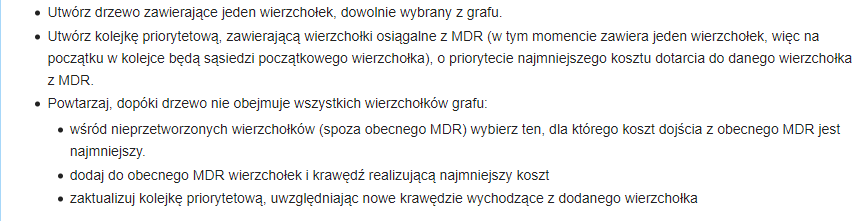

In [39]:
def prima(G:Graph,start=None):
    total=0
    if not start:
        start=0
    tree=set([start])
    con=[]
    Q=G.get_reachable(start)
    while Q:
        dst,u,v=Q.get()
        if v not in tree:
            tree.add(v)
            con.append((u,v))
            total+=dst
            Q.add(G.get_reachable(v))
    return (con,round(total,2)) 

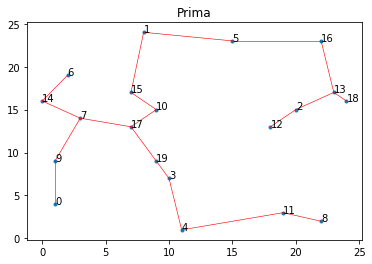

Cost: 86.66


In [40]:
con,cost=prima(G)
G.draw(con,'r',title='Prima',lw=0.6)
print("Cost: "+str(cost))

# 6)Algorytm Kruskala

Algorytm zachłanny wyznaczający minimalne drzewo rozpinające dla grafu nieskierowanego ważonego, o ile jest on spójny.

### Algorytm

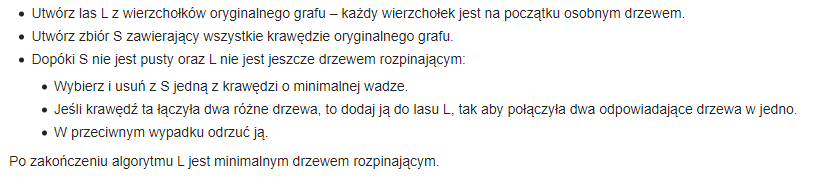

In [41]:
class Forest:
    def __init__(self,lst):
        self.dct={}
        for a in lst:
            self.dct[a]=set([a])  
    
    def is_spannig(self):
        return not bool(len(self.dct)-1)
        
    def connect(self,u,v)->bool:
        for tree_id in self.dct:
            if u in self.dct[tree_id]:
                u_tree=tree_id
            if v in self.dct[tree_id]:
                v_tree=tree_id
        if u_tree==v_tree:
            return False
        else:
            self.dct[u_tree]=self.dct[u_tree].union(self.dct[v_tree])
            self.dct.pop(v_tree)
            return True

In [42]:
def kruskal(G: Graph):
    M=G.matrix_
    n=len(M)
    L=Forest(np.arange(0,n,1).tolist())
    con=[]
    total=0
    Q=G.get_queue()
    while not L.is_spannig() and Q:
        dst,u,v=Q.get()
        if L.connect(u,v):
            total+=dst
            con.append((u,v))
    return (con,round(total,2))

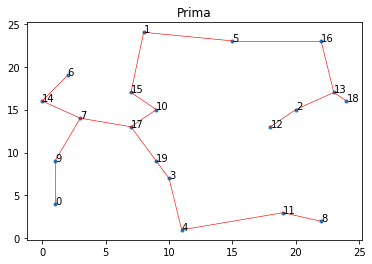

Cost: 86.66


In [43]:
con,cost=kruskal(G)
G.draw(con,'r',title='Prima',lw=0.6)
print("Cost: "+str(cost))

# <center>  Klasy </center>

In [44]:
def make_net_graph(n,size=100,dist=5):
    while True:
        x=np.random.randint(0,size,size=n)
        y=np.random.randint(0,size,size=n)
        temp=set()
        for i in range(n):
            temp.add((x[i],y[i]))
        if len(temp)==len(x):
            break
    T=np.zeros([n,n])
    for i in range(n):
        T[i][i]=0
        for j in range(i+1,n):
            T[i][j]=T[j][i]=round(np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2),2)
    M=np.where(T[:][:]<=dist,T[:][:],np.inf)
    return (M,T,x,y)

In [45]:
class Graph:
    def __init__(self,M: List[List],*args):
        self.matrix_=M
        self.size_=len(M)
        self.queue_=Queue()
        self.cons_=[]
        if len(args)==3:
            self.h_=args[0]
            self.x_=args[1]
            self.y_=args[2]
        if len(args)==2:
            self.x_=args[0]
            self.y_=args[1]
        for i in range(self.size_):
            for j in range(i+1,self.size_):
                if self.matrix_[i][j]<np.inf:
                    self.cons_.append((i,j))
                    self.queue_.add((M[i][j],i,j))
                   
    def __getitem__(self,index:int):
        return self.matrix_[index]
    
    def __len__(self):
        return self.size_
    
    def __make_connections__(self, cons: List[Tuple]):
        n=len(cons)
        x=np.zeros([2,n]).tolist()
        y=np.zeros([2,n]).tolist()
        for i in range(n):
            x[0][i]=self.x_[cons[i][0]]
            x[1][i]=self.x_[cons[i][1]]
            y[0][i]=self.y_[cons[i][0]]
            y[1][i]=self.y_[cons[i][1]]
        return (x,y)
    
    def __points__(self):
        plt.scatter(self.x_,self.y_,marker='.')
        for i in range(self.size_):
            plt.annotate(i,(self.x_[i],self.y_[i]))
                    
    def draw(self,*args,**kwargs):
        title=kwargs.pop('title',None)
        mode='graph'                            #default mode
        if type(args[0]) is list:
            if type(args[0][0]) is int:
                mode='path'
            elif type(args[0][0]) is tuple:
                mode='connections'
        elif type(args[0]) is Map:
            mode='connections'
            args=(args[0].get_connections(),*args[1:])
        functions= {'graph'      :   getattr(self,'__draw_graph__'),
                    'path'       :   getattr(self,'__draw_path__'),
                    'connections':   getattr(self,'__draw_connections__')}
        titles=    {'graph'      :  "Graf",
                    'path'       :   "Ścieżka",
                    'connections':   "Połączenia"}
        f=functions[mode]
        if not title:
            title=titles[mode]
        f(*args,**kwargs,title=title)
            
    def __draw_graph__(self,*args,**kwargs):
        self.__points__()
        filetitle=kwargs.pop('savefig',None)
        title=kwargs.pop('title')
        x,y=self.__make_connections__(self.cons_)
        plt.plot(x,y,*args,**kwargs)
        plt.title(title)
        if filetitle:
            plt.savefig(filetitle)
        plt.show()
        
    def __draw_connections__(self,cons:List[Tuple],*args,**kwargs):
        self.__points__()
        filetitle=kwargs.pop('savefig',None)
        title=kwargs.pop('title')
        x,y=self.__make_connections__(cons)
        plt.plot(x,y,*args,**kwargs)
        plt.title(title)
        if filetitle:
            plt.savefig(filetitle)
        plt.show()
        
    def __draw_path__(self,path:List,*args,**kwargs):
        self.__points__()
        filetitle=kwargs.pop('savefig',None)
        title=kwargs.pop('title')
        plt.plot(self.x_[path],self.y_[path],*args,**kwargs)
        plt.title(title)
        if filetitle:
            plt.savefig(filetitle)
        plt.show()
        
    def get_queue(self):
        return deepcopy(self.queue_)
    
    def get_neighbours(self,id:int):
        lst=[]
        for i in range(self.size_):
            if self.matrix_[id][i]<np.inf:
                lst.append(i)
        return lst
    
    def get_closest(self,id:int):
        dst=np.inf
        ret=None
        for i in range(self.size_):
            if 0<self.matrix_[id][i]<dst:
                dst=self.matrix_[id][i]
                ret=i
        return ret
    
    def get_reachable(self,id:int):
        q_=Queue()
        for i in range(self.size_):
            if 0<self.matrix_[id][i]<np.inf and id != i:
                q_.add((self.matrix_[id][i],id,i))
        return q_

In [46]:

class Map:
    def __init__(self,start:int,num:int):
        self.dct={}
        for i in range(num):
            self.dct[i]=[np.inf,None]
            self.dct[start]=[0,start]
        
    def __len__(self):
        return len(self.dct)
        
    def __iter__(self):
        self.iterator=0
        return self
    
    def __next__(self):
        if self.iterator<len(self.dct):
            self.iterator+=1
            return self.iterator-1
        else:
            raise StopIteration
            
    def __getitem__(self,id:int):
        return self.dct[id]
    
    def __setitem__(self,id:int,data):
        self.dct[id]=data
                
    def __str__(self):
        return self.dct.__str__()
    
    def items(self):
        return self.dct.items()
    
    def get_connections(self):
        con=[]
        for k,v in self.dct.items():
            con.append((k,v[1]))
        return con
    
    def get_closest_from(self,lst: List):
        dst=np.inf
        id=None
        for key,tup in self.dct.items():
            if key in lst and tup[0]<dst:
                dst=self.dct[key][0]
                id=key
        return id
    
    def reconstruct_path(self,start: int, stop: int):
        path=[]
        dest=stop
        while dest!=start:
            path=[dest]+path
            dest=self.dct[dest][1]
        path=[start]+path
        return (path,self.dct[stop][0])

In [47]:

class Queue:
    def __init__(self, arg: List or Tuple = None):
        self.size=0
        self.iter=0
        self.lst=[]             #List[Tuple(dst,u,v)]
        if arg and type(arg) is Queue:
            self.lst=deepcopy(arg.lst)
            self.size=arg.size
        if arg and type(arg) is not Queue:
            self.add(arg)
        
    
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.iter<self.size:
            self.iter+=1
            return self.lst[self.iter-1]
        if self.iter==self.size:
            raise StopIteration
            
    def __bool__(self):
        return bool(self.lst)
    
    def __print__(self):
        for dst,a,b in self.lst:
            print("{} -> {} : {}".format(a,b,dst))
        print("Size: {}    Len: {}".format(self.size,len(self.lst)))
        
    def __add_one__(self,arg):             #[dist,u_id,v_id]   
        dst,u,v=arg
        if dst==np.inf:
            return None
        if self.size:
            for i in range(self.size+1):
                if i<self.size:
                    if dst<self.lst[i][0]:
                        self.lst.insert(i,(dst,u,v))
                        self.size+=1
                        break
                elif i==self.size:
                    self.lst.append((dst,u,v))
                    self.size+=1
        if not self.size:
            self.lst.append((dst,u,v))
            self.size+=1
    
    def __add_queue__(self,queue):
        for tup in queue:
            self.__add_one__(tup)
        
    def add(self,arg: List or Tuple or 'Queue'):
        add_opts={list:     getattr(self,'__add_one__'),
                  tuple:    getattr(self,'__add_one__'),
                  Queue:    getattr(self,'__add_queue__')}
        f=add_opts[type(arg)]
        if f is None:
            raise Exception('Nothing to add')
        f(arg)
        
        
    def get(self):
        if self.size:
            self.size-=1
            return self.lst.pop(0)
        else:
            return None
            
    def __str__(self):
        ret=""
        for dst,u,v in self.lst:
            ret+="{:2} -> {:2} : {}\n".format(u,v,dst)
        return ret